# **Code Analysis Process**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import cv2

## STEP 1 : Importing data Information

In [2]:
# Import data from myData folder
path = 'myData'
## we initialize coloums' name respectively inside our data
coloums =  ['Center','Left','Right','Steering','Throttle','Break','Speed']
data = pd.read_csv(os.path.join(path,'driving_log.csv'), names = coloums)
data.head(10)

,Center,Left,Right,Steering,Throttle,Break,Speed
0,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.000000,0.0,0.000015
1,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.000000,0.0,0.000004
2,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.000000,0.0,0.000012
3,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.149002,0.0,0.127528
4,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.331091,0.0,0.278566
5,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.00,0.522162,0.0,0.589843
6,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,-0.05,0.767315,0.0,1.192646
7,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,-0.25,0.998971,0.0,2.074675
8,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,-0.40,1.000000,0.0,2.776923
9,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,-0.60,1.000000,0.0,3.690960


## STEP2 : Trim path

In [3]:
## now we create a function that trim path from image name

def getName(filePath):
    return filePath.split('\\')[-1]

## example
print(getName(data['Center'][0]))

center_2022_01_09_19_54_00_049.jpg


In [4]:
data['Center'] = data['Center'].apply(getName)
data.head(5)

,Center,Left,Right,Steering,Throttle,Break,Speed
0,center_2022_01_09_19_54_00_049.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000015
1,center_2022_01_09_19_54_00_116.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000004
2,center_2022_01_09_19_54_00_189.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000012
3,center_2022_01_09_19_54_00_266.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.149002,0.0,0.127528
4,center_2022_01_09_19_54_00_334.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.331091,0.0,0.278566


## Step3 : Visualization and Distribution of Data

In [5]:
# Total number of center images
print('Total Imgs Imported : ', data.shape[0])

Total Imgs Imported :  15691


In [6]:
nBins = 31
samplesPerBin = 3000 ## cutoff value for keyboard user
hist, bins = np.histogram(data['Steering'],nBins)
bins

array([-1.        , -0.93548387, -0.87096774, -0.80645161, -0.74193548,
       -0.67741935, -0.61290323, -0.5483871 , -0.48387097, -0.41935484,
       -0.35483871, -0.29032258, -0.22580645, -0.16129032, -0.09677419,
       -0.03225806,  0.03225806,  0.09677419,  0.16129032,  0.22580645,
        0.29032258,  0.35483871,  0.41935484,  0.48387097,  0.5483871 ,
        0.61290323,  0.67741935,  0.74193548,  0.80645161,  0.87096774,
        0.93548387,  1.        ])

In [7]:
center = (bins[:-1] + bins[1:])*0.5
center

array([-0.96774194, -0.90322581, -0.83870968, -0.77419355, -0.70967742,
       -0.64516129, -0.58064516, -0.51612903, -0.4516129 , -0.38709677,
       -0.32258065, -0.25806452, -0.19354839, -0.12903226, -0.06451613,
        0.        ,  0.06451613,  0.12903226,  0.19354839,  0.25806452,
        0.32258065,  0.38709677,  0.4516129 ,  0.51612903,  0.58064516,
        0.64516129,  0.70967742,  0.77419355,  0.83870968,  0.90322581,
        0.96774194])

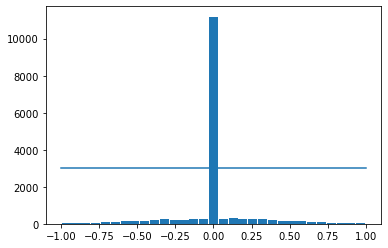

In [8]:
plt.bar(center,hist,width = 0.06)
plt.plot((-1,1),(samplesPerBin,samplesPerBin))
plt.show()

In [9]:
# remove the extra data
removeIndexList = []
for j in range(nBins):
    binDataList = []
    for i in range (len(data['Steering'])):
        if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
            binDataList.append(i)
    binDataList = shuffle(binDataList) ## it will help to shuffle the value
    binDataList = binDataList[samplesPerBin:]
    removeIndexList.extend(binDataList)
print('Removed Images : ', len(removeIndexList))
data.drop(data.index[removeIndexList],inplace=True) ## now we have to remove those indexes from orginal data
print('Remaining Images : ', len(data))

Removed Images :  8184
Remaining Images :  7507


<function matplotlib.pyplot.show(*args, **kw)>

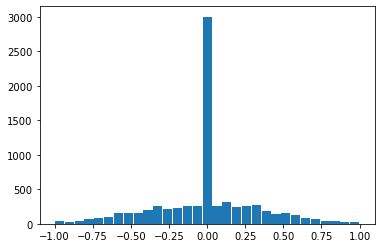

In [10]:
hist, _ = np.histogram(data['Steering'],nBins)
plt.bar(center,hist,width=0.06)
plt.show

## Step4 : Preparing for Processing

In [14]:
imagesPath = []
steering = []

for i in range(len(data)):
    indexData = data.iloc[i]
    #print(indexData)
    imagesPath.append(os.path.join(path,'IMG',indexData[0]))
    #print(os.path.join(path,'IMG',indexData[0]))
    steering.append(float(indexData[3]))
imagesPath = np.asarray(imagesPath)
steerings = np.asarray(steering)

print(imagesPath[0],' -> ',steerings[0])

myData\IMG\center_2022_01_09_19_54_00_472.jpg  ->  -0.05


## Step 5 : Splitting of Data (Training, Validation)

In [12]:
xTrain, xVal, yTrain, yVal  = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)
## Traning => 80% and Validation => 20%

print('Total Traning images : ', len(xTrain))
print('Total Validation images : ',len(xVal))

Total Traning images :  7531
Total Validation images :  1883


## Step 6 : Images Augmentation

#### *PAN*

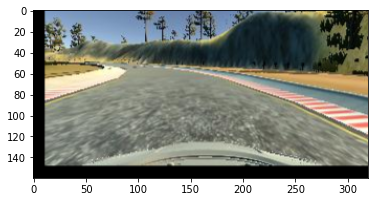

In [13]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)

    # Translation
    pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
    img = pan.augment_image(img)
    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *ZOOM*

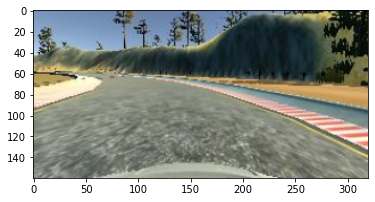

In [14]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    zoom = iaa.Affine(scale=(1,1.2))
    img = zoom.augment_image(img)

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *BRIGHTNESS*

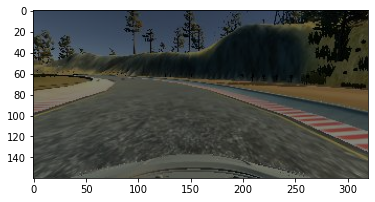

In [15]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    brightness = iaa.Multiply((0.4,1.2))
    img = brightness.augment_image(img)

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *FLIP*

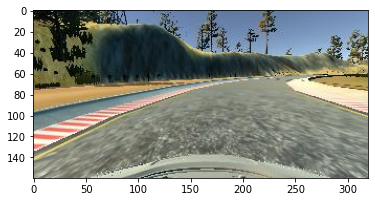

In [16]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    img = cv2.flip(img,1)
    steering = -steering

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *FINAL TOUCH OF RANDOMNESS IN IMAGE AUGMENTATION*

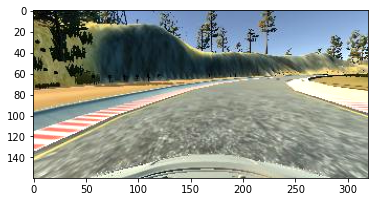

In [17]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)

    # PAN
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
        img = pan.augment_image(img)

    # ZOOM
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)

    # BRIGHTNESS
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.4,1.2))
        img = brightness.augment_image(img)

    # FLIP
    if np.random.rand() < 0.5:
        img = cv2.flip(img,1)
        steering = -steering

    return img, steering


imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

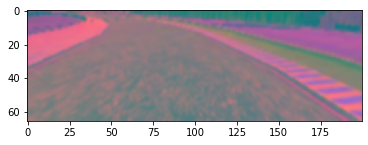

In [18]:
def preProcessing(img):
    img = img[60:135,:,:] # CROP
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV) # RGB -> YUV
    img = cv2.GaussianBlur(img,(3,3),0) # BLUR
    img = cv2.resize(img,(200,66))  #RESIZE
    img = img/255 # NORMALIZATION
    
    return img

imgRe = preProcessing(mpimg.imread('test.jpg'))
plt.imshow(imgRe)
plt.show()